In [1]:
import tensorflow as tf
from glob import glob
from os.path import join
from tensorflow.keras import layers, models
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import imports.GDL_layers as GDL_layers

2022-06-17 10:24:55.873883: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
# Find a list of all the datafiles
patch_path = "/glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/"
patch_files = sorted(glob(join(patch_path, "*.nc")))
patch_ds = xr.open_dataset(patch_files[0])
csv_path = "/glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/"
csv_files = sorted(glob(join(csv_path, "track_step_*.csv")))
meta_ds = pd.read_csv(csv_files[0])

In [3]:
patch_ds

<xarray.Dataset>
Dimensions:           (p: 370, row: 144, col: 144)
Coordinates:
  * p                 (p) int32 0 1 2 3 4 5 6 7 ... 363 364 365 366 367 368 369
  * row               (row) int32 0 1 2 3 4 5 6 ... 137 138 139 140 141 142 143
  * col               (col) int32 0 1 2 3 4 5 6 ... 137 138 139 140 141 142 143
Data variables: (12/26)
    lon               (p, row, col) float32 ...
    lat               (p, row, col) float32 ...
    i                 (p, row, col) int32 ...
    j                 (p, row, col) int32 ...
    x                 (p, row, col) float32 ...
    y                 (p, row, col) float32 ...
    ...                ...
    MLCAPE_prev       (p, row, col) float32 ...
    USHR6_prev        (p, row, col) float32 ...
    VSHR6_prev        (p, row, col) float32 ...
    SBLCL_prev        (p, row, col) float32 ...
    U_BUNK_prev       (p, row, col) float32 ...
    V_BUNK_prev       (p, row, col) float32 ...
Attributes: (12/36)
    Conventions:             CF-1.6
    title:                   NCARSTORM Storm Patches for run 20101024-0000 me...
    object_variable:         REFL_COM
    start_hour:              12
    end_hour:                35
    HRRR_alt_end_hour:       46
    ...                      ...
    single_step:             True
    label_type:              gamma
    model_map_file:          /glade/work/cbecker/hagelslag/mapfiles/ncar_stor...
    mask_file:               None
    run_date_format:         %Y%m%d-%H%M
    json:                    False

In [4]:
meta_ds

,Step_ID,Track_ID,Ensemble_Name,Ensemble_Member,Run_Date,Valid_Date,Forecast_Hour,Valid_Hour_UTC,Duration,Centroid_Lon,...,eccentricity,major_axis_length,minor_axis_length,orientation,Matched,Max_Hail_Size,Num_Matches,Shape,Location,Scale
0,d01_REFL_COM_20101024-0000_12_13_000_00,d01_REFL_COM_20101024-0000_12_13_000,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-24 12:00:00+00:00,12,12,1,-98.41019,...,0.90735,51.23550,21.53869,1.41172,0,0,0,0,0,0
1,d01_REFL_COM_20101024-0000_12_13_000_01,d01_REFL_COM_20101024-0000_12_13_000,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-24 13:00:00+00:00,13,13,2,-97.69198,...,0.85356,26.92719,14.02906,1.13923,0,0,0,0,0,0
2,d01_REFL_COM_20101024-0000_12_12_001_00,d01_REFL_COM_20101024-0000_12_12_001,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-24 12:00:00+00:00,12,12,1,-95.15486,...,0.71815,8.65894,6.02569,0.74301,0,0,0,0,0,0
3,d01_REFL_COM_20101024-0000_12_13_002_00,d01_REFL_COM_20101024-0000_12_13_002,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-24 12:00:00+00:00,12,12,1,-94.39792,...,0.58687,7.89825,6.39509,-1.28875,0,0,0,0,0,0
4,d01_REFL_COM_20101024-0000_12_13_002_01,d01_REFL_COM_20101024-0000_12_13_002,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-24 13:00:00+00:00,13,13,2,-94.21008,...,0.91899,27.65443,10.90375,0.32912,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,d01_REFL_COM_20101024-0000_35_35_238_00,d01_REFL_COM_20101024-0000_35_35_238,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-25 11:00:00+00:00,35,11,1,-85.94177,...,0.44428,6.31100,5.65396,1.29480,0,0,0,0,0,0
366,d01_REFL_COM_20101024-0000_35_35_239_00,d01_REFL_COM_20101024-0000_35_35_239,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-25 11:00:00+00:00,35,11,1,-85.16997,...,0.85947,79.05277,40.41106,0.12811,0,0,0,0,0,0
367,d01_REFL_COM_20101024-0000_35_35_240_00,d01_REFL_COM_20101024-0000_35_35_240,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-25 11:00:00+00:00,35,11,1,-88.18374,...,0.92145,18.05184,7.01316,0.99009,0,0,0,0,0,0
368,d01_REFL_COM_20101024-0000_35_35_241_00,d01_REFL_COM_20101024-0000_35_35_241,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-25 11:00:00+00:00,35,11,1,-82.50549,...,0.93744,14.44305,5.02817,-0.19595,0,0,0,0,0,0


In [5]:
# Pull selected variables from patch files and join into a single DataSet
num_files = 100
variables = ["i", "j", "REFL_COM_curr"]
data_list = []
for p, patch_file in enumerate(patch_files[0:num_files]):
    if p % 10 == 0:
        print(p, patch_file)
    ds = xr.open_dataset(patch_file)
    data_list.append(ds[variables].compute())
    ds.close()
data = xr.concat(data_list, dim="p")

0 /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTORM_20101024-0000_d01_model_patches.nc
10 /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTORM_20110201-0000_d01_model_patches.nc
20 /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTORM_20110326-0000_d01_model_patches.nc
30 /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTORM_20110414-0000_d01_model_patches.nc
40 /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTORM_20110425-0000_d01_model_patches.nc
50 /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTORM_20110522-0000_d01_model_patches.nc
60 /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTORM_20110605-0000_d01_model_patches.nc
70 /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTORM_20110615-0000_d01_model_patches.nc
80 /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTORM_20110625-0000_d01_model_patches.nc
90 /glade/scratch/lverhoef/WR

In [6]:
# Pull variables from csv files and join into an array
csv_variables = ["major_axis_length", "minor_axis_length"]
csv_data_list = []
for p, csv_file in enumerate(csv_files[0:num_files]):
    if p % 10 == 0:
        print(p, csv_file)
    csv_ds = pd.read_csv(csv_file)
    csv_data_list.append(csv_ds[csv_variables].to_xarray().rename({'index': 'p'}))
csv_data = xr.concat(csv_data_list, dim="p")

0 /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTORM_d01_20101024-0000.csv
10 /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTORM_d01_20110201-0000.csv
20 /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTORM_d01_20110326-0000.csv
30 /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTORM_d01_20110414-0000.csv
40 /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTORM_d01_20110425-0000.csv
50 /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTORM_d01_20110522-0000.csv
60 /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTORM_d01_20110605-0000.csv
70 /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTORM_d01_20110615-0000.csv
80 /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTORM_d01_20110625-0000.csv
90 /glade/scratch/lverhoef/WRF_all/tra

In [7]:
# Create DataArrays for input and output data
input_data = data["REFL_COM_curr"].expand_dims("channel", axis=-1)
output_data = csv_data.to_array().transpose()
del data
del csv_data

In [8]:
# Display shapes
print(input_data.shape)
print(output_data.shape)

(33403, 144, 144, 1)
(33403, 2)


In [9]:
# Find indices to split data into 70% training, 10% validation, and 20% test. The training and validation data are shuffled, while the test data is temporally different.
rng = np.random.default_rng()
split_point_1 = int(0.7 * input_data.shape[0])
split_point_2 = int(0.8 * input_data.shape[0])
train_val_indices = np.arange(0, split_point_2)
rng.shuffle(train_val_indices)
train_indices = train_val_indices[:split_point_1]
val_indices = train_val_indices[split_point_1:]
test_indices = np.arange(split_point_2, input_data.shape[0])

In [10]:
# Normalize the training input data and actually evaluate the input_train array which will be fed into the network
input_train = input_data.values[train_indices]
scale_stats = pd.DataFrame(index=[0], columns=["mean", "sd"])
scale_stats.loc[0, "mean"] = input_train.mean()
scale_stats.loc[0, "sd"] = input_train.std()
input_train_norm = (input_train - scale_stats.loc[0, "mean"]) / scale_stats.loc[0, "sd"]

In [11]:
# Normalize the validation data
input_val = input_data.values[val_indices]
input_val_norm = (input_val - scale_stats.loc[0, "mean"]) / scale_stats.loc[0, "sd"]

In [12]:
# Normalize the test input data and generate the test dataset
input_test = input_data.values[test_indices]
input_test_norm = (input_test - scale_stats.loc[0, "mean"]) / scale_stats.loc[0, "sd"]

In [13]:
# Split output into train, test, and validation sets
output_train = output_data[train_indices]
output_val = output_data[val_indices]
output_test = output_data[test_indices]

In [14]:
gdl3_model = models.Sequential()
gdl3_model.add(GDL_layers.RotEquivConv2D(32, (3, 3), rot_axis=False, input_shape=(144, 144, 1)))
gdl3_model.add(GDL_layers.RotEquivPool2D((2, 2)))
gdl3_model.add(GDL_layers.RotEquivConv2D(32, (3, 3)))
gdl3_model.add(GDL_layers.RotEquivPool2D((2, 2)))
gdl3_model.add(GDL_layers.RotEquivConv2D(64, (3, 3)))
gdl3_model.add(GDL_layers.RotEquivPool2D((2, 2)))
gdl3_model.add(GDL_layers.RotEquivConv2D(64, (3, 3)))
gdl3_model.add(GDL_layers.RotEquivPool2D((2, 2)))
gdl3_model.add(GDL_layers.RotEquivConv2D(128, (3, 3)))
gdl3_model.add(GDL_layers.RotInvPool())
gdl3_model.add(layers.Flatten())
gdl3_model.add(layers.Dense(2))

2022-06-17 10:25:44.636997: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-17 10:25:45.180803: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 30988 MB memory:  -> device: 0, name: Tesla V100-SXM2-32GB, pci bus id: 0000:89:00.0, compute capability: 7.0


In [15]:
gdl3_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rot_equiv_conv2d (RotEquivC  (None, 142, 142, 4, 32)  320       
 onv2D)                                                          
                                                                 
 rot_equiv_pool2d (RotEquivP  (None, 71, 71, 4, 32)    0         
 ool2D)                                                          
                                                                 
 rot_equiv_conv2d_1 (RotEqui  (None, 69, 69, 4, 32)    9248      
 vConv2D)                                                        
                                                                 
 rot_equiv_pool2d_1 (RotEqui  (None, 34, 34, 4, 32)    0         
 vPool2D)                                                        
                                                                 
 rot_equiv_conv2d_2 (RotEqui  (None, 32, 32, 4, 64)    1

In [16]:
gdl3_model.compile(
    optimizer='nadam',
    loss='mse',
    # metrics=['mse']
)

In [17]:
gdl3_history = gdl3_model.fit(x=input_train_norm, y=output_train, epochs=20, validation_data=(input_val_norm, output_val))

Epoch 1/20


2022-06-17 10:25:52.359425: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100


731/731 [==============================] - 62s 76ms/step - loss: 260.8963 - val_loss: 165.1988
Epoch 2/20
731/731 [==============================] - 54s 74ms/step - loss: 161.4228 - val_loss: 130.1135
Epoch 3/20
731/731 [==============================] - 54s 74ms/step - loss: 114.6061 - val_loss: 107.7307
Epoch 4/20
731/731 [==============================] - 54s 74ms/step - loss: 91.9543 - val_loss: 99.7908
Epoch 5/20
731/731 [==============================] - 54s 74ms/step - loss: 70.9855 - val_loss: 110.8760
Epoch 6/20
731/731 [==============================] - 54s 74ms/step - loss: 60.9289 - val_loss: 66.6707
Epoch 7/20
731/731 [==============================] - 54s 74ms/step - loss: 48.7152 - val_loss: 63.3466
Epoch 8/20
731/731 [==============================] - 54s 74ms/step - loss: 39.2620 - val_loss: 56.7085
Epoch 9/20
731/731 [==============================] - 54s 74ms/step - loss: 32.5775 - val_loss: 80.2522
Epoch 10/20
731/731 [==============================] - 54s 74ms/step

In [18]:
gdl5_model = models.Sequential()
gdl5_model.add(GDL_layers.RotEquivConv2D(32, (5, 5), rot_axis=False, input_shape=(144, 144, 1)))
gdl5_model.add(GDL_layers.RotEquivPool2D((2, 2)))
gdl5_model.add(GDL_layers.RotEquivConv2D(32, (5, 5)))
gdl5_model.add(GDL_layers.RotEquivPool2D((2, 2)))
gdl5_model.add(GDL_layers.RotEquivConv2D(64, (5, 5)))
gdl5_model.add(GDL_layers.RotEquivPool2D((2, 2)))
gdl5_model.add(GDL_layers.RotEquivConv2D(64, (5, 5)))
gdl5_model.add(GDL_layers.RotEquivPool2D((2, 2)))
gdl5_model.add(GDL_layers.RotEquivConv2D(128, (5, 5)))
gdl5_model.add(GDL_layers.RotInvPool())
gdl5_model.add(layers.Flatten())
gdl5_model.add(layers.Dense(2))

In [19]:
gdl5_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rot_equiv_conv2d_5 (RotEqui  (None, 140, 140, 4, 32)  832       
 vConv2D)                                                        
                                                                 
 rot_equiv_pool2d_4 (RotEqui  (None, 70, 70, 4, 32)    0         
 vPool2D)                                                        
                                                                 
 rot_equiv_conv2d_6 (RotEqui  (None, 66, 66, 4, 32)    25632     
 vConv2D)                                                        
                                                                 
 rot_equiv_pool2d_5 (RotEqui  (None, 33, 33, 4, 32)    0         
 vPool2D)                                                        
                                                                 
 rot_equiv_conv2d_7 (RotEqui  (None, 29, 29, 4, 64)   

In [20]:
gdl5_model.compile(
    optimizer='nadam',
    loss='mse',
    # metrics=['mse']
)

In [21]:
gdl5_history = gdl5_model.fit(x=input_train_norm, y=output_train, epochs=20, validation_data=(input_val_norm, output_val))

Epoch 1/20
731/731 [==============================] - 62s 78ms/step - loss: 245.2888 - val_loss: 148.3530
Epoch 2/20
731/731 [==============================] - 56s 76ms/step - loss: 137.4447 - val_loss: 139.7873
Epoch 3/20
731/731 [==============================] - 56s 77ms/step - loss: 92.8321 - val_loss: 88.3158
Epoch 4/20
731/731 [==============================] - 56s 77ms/step - loss: 69.7878 - val_loss: 179.8911
Epoch 5/20
731/731 [==============================] - 56s 77ms/step - loss: 52.9427 - val_loss: 68.2937
Epoch 6/20
731/731 [==============================] - 56s 77ms/step - loss: 37.9179 - val_loss: 49.5412
Epoch 7/20
731/731 [==============================] - 56s 76ms/step - loss: 28.5813 - val_loss: 58.7336
Epoch 8/20
731/731 [==============================] - 56s 77ms/step - loss: 24.1231 - val_loss: 51.8909
Epoch 9/20
731/731 [==============================] - 56s 77ms/step - loss: 19.4355 - val_loss: 51.0278
Epoch 10/20
731/731 [==============================] - 56s 

In [22]:
cnn3_model = models.Sequential()
cnn3_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(144, 144, 1)))
cnn3_model.add(layers.MaxPooling2D((2, 2)))
cnn3_model.add(layers.Conv2D(32, (3, 3), activation='relu'))
cnn3_model.add(layers.MaxPooling2D((2, 2)))
cnn3_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn3_model.add(layers.MaxPooling2D((2, 2)))
cnn3_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn3_model.add(layers.MaxPooling2D((2, 2)))
cnn3_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
cnn3_model.add(layers.Flatten())
cnn3_model.add(layers.Dense(2, kernel_regularizer='L2'))

In [23]:
cnn3_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 142, 142, 32)      320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 71, 71, 32)       0         
 2D)                                                             
                                                                 
 conv2d_1 (Conv2D)           (None, 69, 69, 32)        9248      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 34, 34, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 16, 16, 64)      

In [24]:
cnn3_model.compile(
    optimizer='nadam',
    loss='mse',
    # metrics=['mse']
)

In [25]:
cnn3_history = cnn3_model.fit(x=input_train_norm, y=output_train, epochs=20, validation_data=(input_val_norm, output_val))

Epoch 1/20
731/731 [==============================] - 13s 16ms/step - loss: 265.4673 - val_loss: 206.7344
Epoch 2/20
731/731 [==============================] - 12s 16ms/step - loss: 182.0286 - val_loss: 225.0485
Epoch 3/20
731/731 [==============================] - 12s 16ms/step - loss: 146.1910 - val_loss: 167.3248
Epoch 4/20
731/731 [==============================] - 12s 16ms/step - loss: 114.8247 - val_loss: 114.8075
Epoch 5/20
731/731 [==============================] - 12s 16ms/step - loss: 92.7202 - val_loss: 103.3639
Epoch 6/20
731/731 [==============================] - 12s 16ms/step - loss: 75.5569 - val_loss: 85.0691
Epoch 7/20
731/731 [==============================] - 12s 16ms/step - loss: 62.9120 - val_loss: 82.3700
Epoch 8/20
731/731 [==============================] - 12s 16ms/step - loss: 54.6728 - val_loss: 79.6594
Epoch 9/20
731/731 [==============================] - 12s 16ms/step - loss: 46.5309 - val_loss: 75.7271
Epoch 10/20
731/731 [==============================] - 

In [26]:
cnn5_model = models.Sequential()
cnn5_model.add(layers.Conv2D(32, (5, 5), activation='relu', input_shape=(144, 144, 1)))
cnn5_model.add(layers.MaxPooling2D((2, 2)))
cnn5_model.add(layers.Conv2D(32, (5, 5), activation='relu'))
cnn5_model.add(layers.MaxPooling2D((2, 2)))
cnn5_model.add(layers.Conv2D(64, (5, 5), activation='relu'))
cnn5_model.add(layers.MaxPooling2D((2, 2)))
cnn5_model.add(layers.Conv2D(64, (5, 5), activation='relu'))
cnn5_model.add(layers.MaxPooling2D((2, 2)))
cnn5_model.add(layers.Conv2D(128, (5, 5), activation='relu'))
cnn5_model.add(layers.Flatten())
cnn5_model.add(layers.Dense(2, kernel_regularizer='L2'))

In [27]:
cnn5_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 142, 142, 32)      320       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 71, 71, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 69, 69, 32)        9248      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 34, 34, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 16, 16, 64)      

In [28]:
cnn5_model.compile(
    optimizer='nadam',
    loss='mse',
    # metrics=['mse']
)

In [29]:
cnn5_history = cnn5_model.fit(x=input_train_norm, y=output_train, epochs=20, validation_data=(input_val_norm, output_val))

Epoch 1/20
731/731 [==============================] - 13s 16ms/step - loss: 271.1677 - val_loss: 252.2820
Epoch 2/20
731/731 [==============================] - 12s 16ms/step - loss: 187.0761 - val_loss: 166.8739
Epoch 3/20
731/731 [==============================] - 12s 16ms/step - loss: 148.1506 - val_loss: 138.7346
Epoch 4/20
731/731 [==============================] - 12s 16ms/step - loss: 120.0405 - val_loss: 113.1486
Epoch 5/20
731/731 [==============================] - 12s 16ms/step - loss: 97.6786 - val_loss: 116.3914
Epoch 6/20
731/731 [==============================] - 12s 16ms/step - loss: 81.5175 - val_loss: 100.8063
Epoch 7/20
731/731 [==============================] - 12s 16ms/step - loss: 66.4862 - val_loss: 88.3524
Epoch 8/20
731/731 [==============================] - 12s 16ms/step - loss: 56.8088 - val_loss: 89.6711
Epoch 9/20
731/731 [==============================] - 12s 16ms/step - loss: 47.3450 - val_loss: 83.4148
Epoch 10/20
731/731 [==============================] -

(0.0, 284.0286371707916)

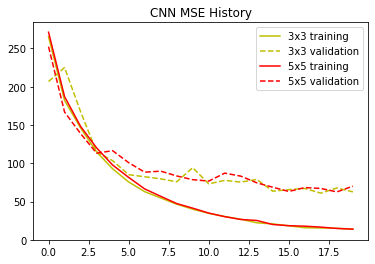

In [32]:
a = plt.plot(cnn3_history.history['loss'], 'y', label='3x3 training')
b = plt.plot(cnn3_history.history['val_loss'], 'y--', label='3x3 validation')
c = plt.plot(cnn5_history.history['loss'], 'r', label='5x5 training')
d = plt.plot(cnn5_history.history['val_loss'], 'r--', label='5x5 validation')
plt.legend()
plt.title("CNN MSE History")
ax = plt.gca()
ax.set_ylim(bottom=0)

(0.0, 273.47412672042844)

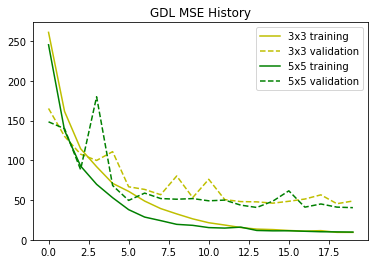

In [33]:
a = plt.plot(gdl3_history.history['loss'], 'y', label='3x3 training')
b = plt.plot(gdl3_history.history['val_loss'], 'y--', label='3x3 validation')
c = plt.plot(gdl5_history.history['loss'], 'g', label='5x5 training')
d = plt.plot(gdl5_history.history['val_loss'], 'g--', label='5x5 validation')
plt.legend()
plt.title("GDL MSE History")
ax = plt.gca()
ax.set_ylim(bottom=0)

(0.0, 278.2736598014832)

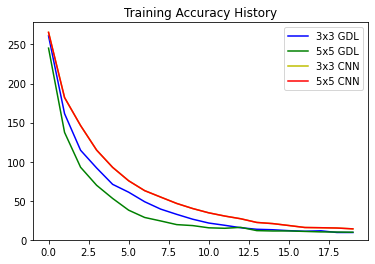

In [34]:
a = plt.plot(gdl3_history.history['loss'], 'b', label='3x3 GDL')
b = plt.plot(gdl5_history.history['loss'], 'g', label='5x5 GDL')
c = plt.plot(cnn3_history.history['loss'], 'y', label='3x3 CNN')
d = plt.plot(cnn3_history.history['loss'], 'r', label='5x5 CNN')
plt.legend()
plt.title("Training Accuracy History")
ax = plt.gca()
ax.set_ylim(bottom=0)

(0.0, 262.87537517547605)

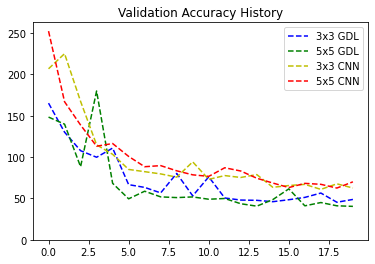

In [36]:
a = plt.plot(gdl3_history.history['val_loss'], 'b--', label='3x3 GDL')
b = plt.plot(gdl5_history.history['val_loss'], 'g--', label='5x5 GDL')
c = plt.plot(cnn3_history.history['val_loss'], 'y--', label='3x3 CNN')
d = plt.plot(cnn5_history.history['val_loss'], 'r--', label='5x5 CNN')
plt.title("Validation Accuracy History")
plt.legend()
ax = plt.gca()
ax.set_ylim(bottom=0)

In [37]:
gdl3_model.evaluate(input_test_norm, output_test)
gdl5_model.evaluate(input_test_norm, output_test)

209/209 [==============================] - 5s 25ms/step - loss: 23.5468


23.54681968688965

In [38]:
cnn3_model.evaluate(input_test_norm, output_test)
cnn5_model.evaluate(input_test_norm, output_test)

209/209 [==============================] - 1s 5ms/step - loss: 33.9165


33.91648864746094